In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
remate = pd.read_csv('ANEXO1_2085_VEH_REMATE - 2085 ELEGIBLES APTOS sPARAREMATE.csv', header=2) 
remate = remate.drop(remate.columns[0], axis=1)


#  **Trabajo data set Remates de Vehículos ATM**


### En este documento se hará Análisis Estadísticos y Visualización de datos de los remates que hace la ATM en via a la costa 

In [4]:
remate.head()


,N°,Placa,Observacion,Chasis,Motor,Marca,Tipo Vehiculo,Clase,Inventario No,N° SERVICIO,...,FECHA,ASIGNADO,Determinacion tributaria,ítulo de crédito,Coactiva,Estado,GRAVAMEN SI O NO,TIPO DE GRAVAMEN,TIPO DE BLOQUEO,OBSERVACIONES NO. 2
0,1,AA005V,Sin novedad,8LACAKKC6J5080930,JP162FMJ1800121930,TUNDRA,MOTOCICLETA,MOTOCICLETA,GUAY0099030,GP-220220059821,...,10/3/2025,CSAUD,Notificado,Notificado,Notificado,Vehiculo En custodia,NO TIENE GRAVAMEN,NO TIENE GRAVAMEN,NO TIENE BLOQUEO,APTO PARA REMATE
1,2,AA012W,Sin novedad,8LRPCKL08J0010596,AD162FMJJ0092966,TUNDRA,MOTOCICLETA,MOTOCICLETA,GUAY0126413,GP-220220073579,...,26/3/2025,GCORNEJO,Notificado,Notificado,Notificado,Vehiculo En custodia,NO TIENE GRAVAMEN,NO TIENE GRAVAMEN,NO TIENE BLOQUEO,APTO PARA REMATE
2,3,AA020T,Sin novedad,LWPPCKUN0J0GN4928,162FMJJ0GN4830,MOTOR 1,MOTOCICLETA,MOTOCICLETA,GUAY0132866,GP-220220076803,...,31/3/2025,CSAUD,Notificado,Notificado,Notificado,Vehiculo En custodia,NO TIENE GRAVAMEN,NO TIENE GRAVAMEN,NO TIENE BLOQUEO,APTO PARA REMATE
3,4,AA040J,Sin novedad,LF3PCK70XJB003891,162FMJJ5057479,BULTACO,MOTOCICLETA,MOTOCICLETA,DAULE0097700,GP-120220049248,...,1/4/2025,GCORNEJO POR CAMBIO ADMINISTRATIVO JARAGUNDI,Notificado,Notificado,Notificado,Vehiculo En custodia,NO TIENE GRAVAMEN,NO TIENE GRAVAMEN,NO TIENE BLOQUEO,APTO PARA REMATE
4,5,AA058W,Sin novedad,MD2A76AY8JWM91918,PFYWJM39079,BAJAJ,MOTOCICLETA,MOTOCICLETA,DAULE0097004,GP-120220048901,...,1/4/2025,GCORNEJO POR CAMBIO ADMINISTRATIVO JARAGUNDI,Notificado,Notificado,Notificado,Vehiculo En custodia,NO TIENE GRAVAMEN,NO TIENE GRAVAMEN,NO TIENE BLOQUEO,APTO PARA REMATE


### Primero vamos a limpiar un poco el documento

In [5]:
remate.drop_duplicates()

,N°,Placa,Observacion,Chasis,Motor,Marca,Tipo Vehiculo,Clase,Inventario No,N° SERVICIO,...,FECHA,ASIGNADO,Determinacion tributaria,ítulo de crédito,Coactiva,Estado,GRAVAMEN SI O NO,TIPO DE GRAVAMEN,TIPO DE BLOQUEO,OBSERVACIONES NO. 2
0,1,AA005V,Sin novedad,8LACAKKC6J5080930,JP162FMJ1800121930,TUNDRA,MOTOCICLETA,MOTOCICLETA,GUAY0099030,GP-220220059821,...,10/3/2025,CSAUD,Notificado,Notificado,Notificado,Vehiculo En custodia,NO TIENE GRAVAMEN,NO TIENE GRAVAMEN,NO TIENE BLOQUEO,APTO PARA REMATE
1,2,AA012W,Sin novedad,8LRPCKL08J0010596,AD162FMJJ0092966,TUNDRA,MOTOCICLETA,MOTOCICLETA,GUAY0126413,GP-220220073579,...,26/3/2025,GCORNEJO,Notificado,Notificado,Notificado,Vehiculo En custodia,NO TIENE GRAVAMEN,NO TIENE GRAVAMEN,NO TIENE BLOQUEO,APTO PARA REMATE
2,3,AA020T,Sin novedad,LWPPCKUN0J0GN4928,162FMJJ0GN4830,MOTOR 1,MOTOCICLETA,MOTOCICLETA,GUAY0132866,GP-220220076803,...,31/3/2025,CSAUD,Notificado,Notificado,Notificado,Vehiculo En custodia,NO TIENE GRAVAMEN,NO TIENE GRAVAMEN,NO TIENE BLOQUEO,APTO PARA REMATE
3,4,AA040J,Sin novedad,LF3PCK70XJB003891,162FMJJ5057479,BULTACO,MOTOCICLETA,MOTOCICLETA,DAULE0097700,GP-120220049248,...,1/4/2025,GCORNEJO POR CAMBIO ADMINISTRATIVO JARAGUNDI,Notificado,Notificado,Notificado,Vehiculo En custodia,NO TIENE GRAVAMEN,NO TIENE GRAVAMEN,NO TIENE BLOQUEO,APTO PARA REMATE
4,5,AA058W,Sin novedad,MD2A76AY8JWM91918,PFYWJM39079,BAJAJ,MOTOCICLETA,MOTOCICLETA,DAULE0097004,GP-120220048901,...,1/4/2025,GCORNEJO POR CAMBIO ADMINISTRATIVO JARAGUNDI,Notificado,Notificado,Notificado,Vehiculo En custodia,NO TIENE GRAVAMEN,NO TIENE GRAVAMEN,NO TIENE BLOQUEO,APTO PARA REMATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,2081,O003287,Sin novedad,DT125E860009371,DT125E860009371,YAMAHA,MOTOCICLETA,MOTOCICLETA,DAULE0091200,GP-120220045999,...,16/4/2025,CSAUD,Notificado,Notificado,Notificado,Vehiculo En custodia,NO TIENE GRAVAMEN,NO TIENE GRAVAMEN,NO TIENE BLOQUEO,APTO PARA REMATE
2081,2082,P013207,Sin novedad,9FSSG11A03C020305,TS1852159994,SUZUKI,MOTOCICLETA,MOTOCICLETA,DAULE0087896,GP-120220044350,...,16/4/2025,CSAUD,Notificado,Notificado,Notificado,Vehiculo En custodia,NO TIENE GRAVAMEN,NO TIENE GRAVAMEN,NO TIENE BLOQUEO,APTO PARA REMATE
2082,2083,PQI0986,Sin novedad,MR0FR22G480646919,2KD6076962,TOYOTA,Tipo 2,CAMIONETA,GUAY0123822,GP-220220072284,...,10/3/2025,GCORNEJO,Notificado,Notificado,Notificado,Vehiculo En custodia,NO TIENE GRAVAMEN,NO TIENE GRAVAMEN,NO TIENE BLOQUEO,APTO PARA REMATE
2083,2084,PTT0291,Sin novedad,KN15P22J2WK080049,B1056151,KIA,Tipo 1,AUTOMOVIL,DAULE0099168,GP-120220049982,...,10/3/2025,GCORNEJO,Notificado,Notificado,Notificado,Vehiculo En custodia,NO TIENE GRAVAMEN,NO TIENE GRAVAMEN,NO TIENE BLOQUEO,APTO PARA REMATE


In [6]:
remate_limpio = remate.copy()

In [7]:
remate_limpio.to_csv('remate_limpio.csv', index=False)

In [8]:
df = pd.read_csv('remate_limpio.csv')
df.head()


,N°,Placa,Observacion,Chasis,Motor,Marca,Tipo Vehiculo,Clase,Inventario No,N° SERVICIO,...,FECHA,ASIGNADO,Determinacion tributaria,ítulo de crédito,Coactiva,Estado,GRAVAMEN SI O NO,TIPO DE GRAVAMEN,TIPO DE BLOQUEO,OBSERVACIONES NO. 2
0,1,AA005V,Sin novedad,8LACAKKC6J5080930,JP162FMJ1800121930,TUNDRA,MOTOCICLETA,MOTOCICLETA,GUAY0099030,GP-220220059821,...,10/3/2025,CSAUD,Notificado,Notificado,Notificado,Vehiculo En custodia,NO TIENE GRAVAMEN,NO TIENE GRAVAMEN,NO TIENE BLOQUEO,APTO PARA REMATE
1,2,AA012W,Sin novedad,8LRPCKL08J0010596,AD162FMJJ0092966,TUNDRA,MOTOCICLETA,MOTOCICLETA,GUAY0126413,GP-220220073579,...,26/3/2025,GCORNEJO,Notificado,Notificado,Notificado,Vehiculo En custodia,NO TIENE GRAVAMEN,NO TIENE GRAVAMEN,NO TIENE BLOQUEO,APTO PARA REMATE
2,3,AA020T,Sin novedad,LWPPCKUN0J0GN4928,162FMJJ0GN4830,MOTOR 1,MOTOCICLETA,MOTOCICLETA,GUAY0132866,GP-220220076803,...,31/3/2025,CSAUD,Notificado,Notificado,Notificado,Vehiculo En custodia,NO TIENE GRAVAMEN,NO TIENE GRAVAMEN,NO TIENE BLOQUEO,APTO PARA REMATE
3,4,AA040J,Sin novedad,LF3PCK70XJB003891,162FMJJ5057479,BULTACO,MOTOCICLETA,MOTOCICLETA,DAULE0097700,GP-120220049248,...,1/4/2025,GCORNEJO POR CAMBIO ADMINISTRATIVO JARAGUNDI,Notificado,Notificado,Notificado,Vehiculo En custodia,NO TIENE GRAVAMEN,NO TIENE GRAVAMEN,NO TIENE BLOQUEO,APTO PARA REMATE
4,5,AA058W,Sin novedad,MD2A76AY8JWM91918,PFYWJM39079,BAJAJ,MOTOCICLETA,MOTOCICLETA,DAULE0097004,GP-120220048901,...,1/4/2025,GCORNEJO POR CAMBIO ADMINISTRATIVO JARAGUNDI,Notificado,Notificado,Notificado,Vehiculo En custodia,NO TIENE GRAVAMEN,NO TIENE GRAVAMEN,NO TIENE BLOQUEO,APTO PARA REMATE


In [9]:
conteo_marcas = remate_limpio['Marca'].value_counts()
conteo_marcas

Marca
SHINERAY        377
SUZUKI          305
TUNDRA          292
DAYTONA         179
TUKO             90
               ... 
KEEWAY            1
BAOTIAN           1
FYMSACH ROAD      1
TOYOTA            1
KIA               1
Name: count, Length: 86, dtype: int64

### Voy hacer un grafico de los top #10 Vehículos que mas se rematan por marcas

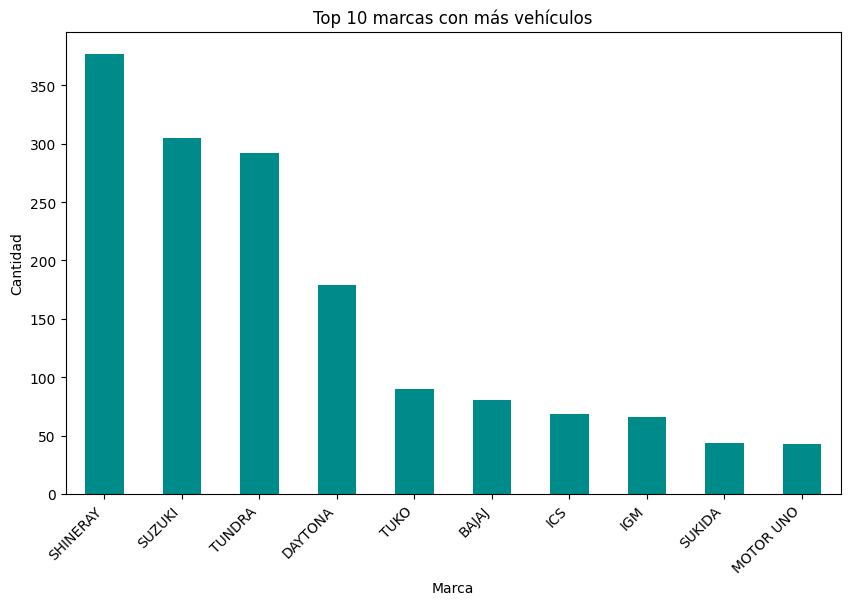

In [10]:
top10 = conteo_marcas.head(10)

plt.figure(figsize=(10,6))
top10.plot(kind='bar', color='darkcyan')
plt.title('Top 10 marcas con más vehículos')
plt.xlabel('Marca')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.show()


### Cantidad de clases de Vehículos: Motos, Autos y camionetas. En un grafico de barras

Clase
MOTOCICLETA    2064
AUTOMOVIL        19
CAMIONETA         2
Name: count, dtype: int64


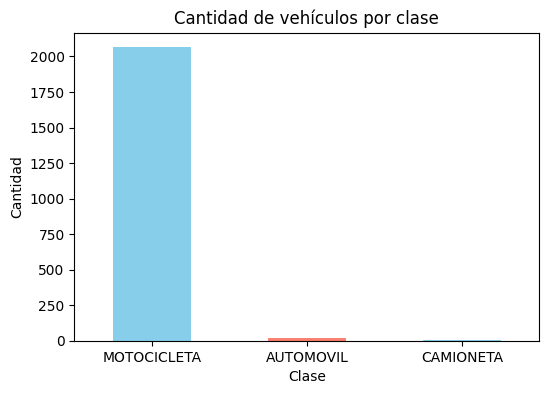

In [11]:
conteo_clase = df['Clase'].value_counts()
print(conteo_clase)
plt.figure(figsize=(6,4))
conteo_clase.plot(kind='bar', color=['skyblue','salmon'])
plt.title("Cantidad de vehículos por clase")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.show()

### Hare un grafico del  Estado General del Vehículos atravez de la 15 marcas con mas carros

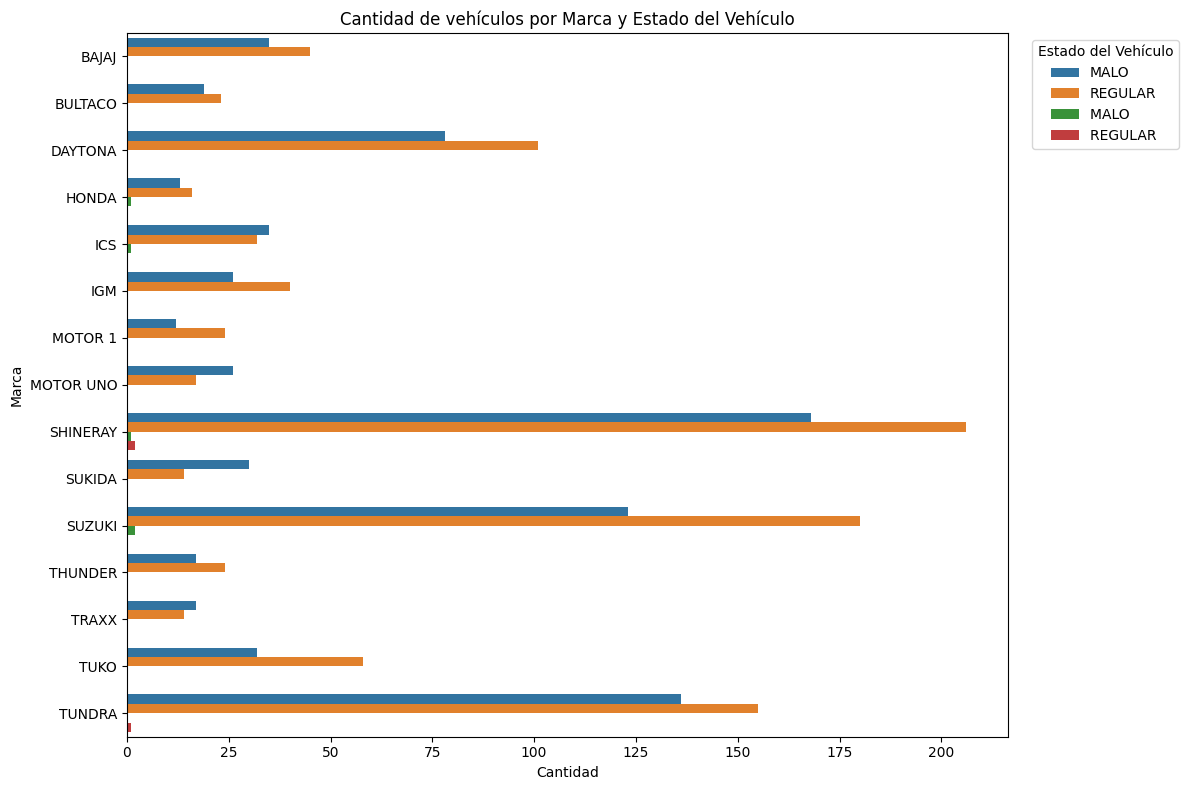

In [12]:
df = remate_limpio.copy()


df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(r'\s+', '_', regex=True)
              .str.normalize('NFKD').str.encode('ascii','ignore').str.decode('ascii'))


df = df[df['marca'].notna() & df['estado_del_vehiculo'].notna()]

conteo = (df.groupby(['marca','estado_del_vehiculo'])
            .size()
            .reset_index(name='cantidad'))

top_marcas = df['marca'].value_counts().head(15).index
conteo_top = conteo[conteo['marca'].isin(top_marcas)]

plt.figure(figsize=(12,8))
sns.barplot(data=conteo_top, y='marca', x='cantidad', hue='estado_del_vehiculo')
plt.title('Cantidad de vehículos por Marca y Estado del Vehículo')
plt.xlabel('Cantidad')
plt.ylabel('Marca')
plt.legend(title='Estado del Vehículo', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()
